# Correlations between Shots Gained statistics from PGA Tour

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Import data

df = pd.read_csv('C:\ASA All PGA Raw Data - Tourn Level.csv')

In [3]:
df.head(10)

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04
5,A. Putnam,401353224,5502,144,151,19.5,12.0,19,0,6.0,...,12.0,2022,0,CUT,-0.97,0.14,-2.02,0.31,-1.56,-2.54
6,A. Rai,401353224,10906,288,287,63.0,55.7,58,3,7.2,...,12.0,2022,0,T26,2.05,0.74,-1.32,-0.12,-0.70,1.35
7,A. Schenk,401353224,10372,288,287,59.5,54.0,59,0,7.8,...,12.0,2022,0,T26,-0.96,-0.01,1.84,0.48,2.31,1.35
8,A. Scott,401353224,388,288,299,48.5,34.7,48,0,5.4,...,12.0,2022,0,T67,-0.82,-1.79,2.00,-1.04,-0.83,-1.65
9,A. Smalley,401353224,9484,144,151,18.0,10.9,20,0,0.6,...,12.0,2022,0,CUT,-1.89,-0.71,0.71,-0.65,-0.65,-2.54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
Player_initial_last    36864 non-null object
tournament id          36864 non-null int64
player id              36864 non-null int64
hole_par               36864 non-null int64
strokes                36864 non-null int64
hole_DKP               36864 non-null float64
hole_FDP               36864 non-null float64
hole_SDP               36864 non-null int64
streak_DKP             36864 non-null int64
streak_FDP             36864 non-null float64
streak_SDP             36864 non-null int64
n_rounds               36864 non-null int64
made_cut               36864 non-null int64
pos                    21317 non-null float64
finish_DKP             36864 non-null int64
finish_FDP             36864 non-null int64
finish_SDP             36864 non-null int64
total_DKP              36864 non-null float64
total_FDP              36864 non-null float64
total_SDP              36864 non-null int6

In [5]:
df.describe()

,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,3.686400e+04,3.686400e+04,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,...,0.0,36864.000000,36864.000000,36864.000000,29180.000000,29180.000000,29180.000000,29180.000000,29180.000000,29181.000000
mean,2.331807e+08,7.979041e+04,225.547065,224.114502,50.130249,44.375789,49.323703,1.764052,7.686844,1.683485,...,NaN,7.529612,2018.539686,0.065294,-0.121005,-0.040744,-0.101759,-0.045896,-0.188346,-0.305491
std,1.979221e+08,5.753816e+05,70.295590,66.789007,24.025854,24.153313,22.202915,2.846552,7.252924,2.668202,...,NaN,2.192712,2.213050,0.247047,1.119451,0.727315,1.119763,0.808139,1.640817,1.966669
min,2.230000e+03,5.000000e+00,70.000000,66.000000,-2.500000,-21.400000,-11.000000,0.000000,0.000000,0.000000,...,NaN,3.000000,2015.000000,0.000000,-5.990000,-6.430000,-9.250000,-7.740000,-13.950000,-13.670000
25%,2.696000e+03,1.170000e+03,143.000000,146.000000,27.000000,22.600000,28.000000,0.000000,0.800000,0.000000,...,NaN,6.400000,2017.000000,0.000000,-0.770000,-0.450000,-0.740000,-0.450000,-1.080000,-1.370000
50%,4.010565e+08,3.793000e+03,280.000000,272.000000,53.500000,46.100000,55.000000,0.000000,6.400000,0.000000,...,NaN,7.100000,2019.000000,0.000000,-0.040000,0.000000,0.000000,0.050000,-0.010000,-0.160000
75%,4.012195e+08,6.151000e+03,286.000000,281.000000,69.000000,64.000000,69.000000,3.000000,12.400000,3.000000,...,NaN,8.700000,2021.000000,0.000000,0.630000,0.420000,0.640000,0.480000,0.920000,1.060000
max,4.013669e+08,4.845309e+06,292.000000,325.000000,174.000000,134.700000,107.000000,23.000000,43.600000,22.000000,...,NaN,20.000000,2022.000000,1.000000,4.430000,3.170000,4.670000,2.770000,6.300000,8.520000


In [6]:
# Drop Null Columns

raw_data = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [7]:
raw_data = raw_data.dropna()

In [8]:
raw_data.Finish.dtypes

dtype('O')

In [9]:
# View count of each unique value in 'Finish' column 

pd.set_option("display.max_rows", None)

raw_data.Finish.value_counts()

T18    324
T17    319
T13    288
T26    280
T35    276
T42    271
T10    269
T14    262
T4     254
T7     254
T25    252
T8     251
T11    250
T23    249
T41    248
T33    248
T37    246
T43    245
T30    245
T12    245
T16    243
1      240
T22    237
T21    234
T6     233
T20    231
T32    231
T57    229
T9     227
T29    224
T49    223
T53    218
T48    211
T3     210
T28    210
T51    209
T39    209
T5     208
T24    208
T58    202
T15    199
T47    195
T55    194
T52    193
T27    193
T31    189
T64    188
T56    187
T2     186
T40    186
T60    185
T36    181
T38    180
T45    174
T59    172
T54    169
T46    168
T34    166
T65    165
T44    162
2      162
T50    161
T61    157
T62    139
T63    137
T67    136
T19    135
T66    128
T69    116
T68    110
T70    102
T71     97
T72     89
3       88
T75     57
4       51
5       46
T73     46
CUT     45
73      43
68      42
67      41
74      41
T74     40
70      39
72      35
69      34
71      34
66      32
75      30
6       26

In [10]:
# Change Finish from object to integer

raw_data['Finish'] = raw_data['Finish'].astype(int)


raw_data.info()

ValueError: invalid literal for int() with base 10: 'T32'

In [11]:
# Create new data frame with select columns 

data_main = raw_data[['player','Finish','sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total']]
data_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 36751
Data columns (total 8 columns):
player      16291 non-null object
Finish      16291 non-null object
sg_putt     16291 non-null float64
sg_arg      16291 non-null float64
sg_app      16291 non-null float64
sg_ott      16291 non-null float64
sg_t2g      16291 non-null float64
sg_total    16291 non-null float64
dtypes: float64(6), object(2)
memory usage: 1.1+ MB


In [12]:
data_main.corr()

,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
sg_putt,1.000000,-0.036379,-0.121434,-0.089723,-0.150708,0.499551
sg_arg,-0.036379,1.000000,-0.042949,-0.064164,0.412061,0.335168
sg_app,-0.121434,-0.042949,1.000000,0.072299,0.735039,0.562608
sg_ott,-0.089723,-0.064164,0.072299,1.000000,0.536069,0.411718
sg_t2g,-0.150708,0.412061,0.735039,0.536069,1.000000,0.775543
sg_total,0.499551,0.335168,0.562608,0.411718,0.775543,1.000000


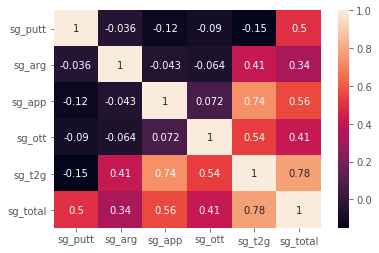

In [13]:
corr_matrix = data_main.corr()

sns.heatmap(corr_matrix, annot=True)

plt.show()

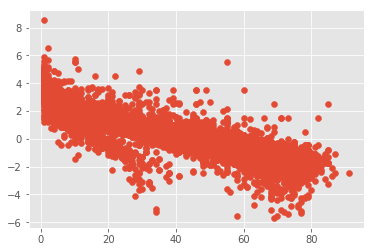

In [36]:
plt.scatter(data_main['Finish'], data_main['sg_total'])

plt.show();